<a href="https://colab.research.google.com/github/p0mona/university_data_analysis_methods/blob/main/mad_lab6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [14]:
names_path = '/content/imiona.xlsx'
names = pd.read_excel(names_path)
names.head()

,Rok,Imie,Liczba,Plec
0,2000,JAKUB,14497,M
1,2000,MATEUSZ,11454,M
2,2000,KACPER,8898,M
3,2000,MICHAŁ,8498,M
4,2000,PATRYK,7743,M


In [3]:
people_path = '/content/ludnosc.xlsx'
people = pd.read_excel(people_path)
people.head()

,Kraj,2006,2007,2008,2009,2011,2012,2016,2017
0,Chińska Republika Ludowa,1.314480e+09,1.321290e+09,1.328020e+09,1.338613e+09,1.336718e+09,1.343240e+09,1.373541e+09,1.379303e+09
1,Indie,1.095352e+09,1.129866e+09,1.147996e+09,1.166079e+09,1.189173e+09,1.205074e+09,1.266884e+09,1.281936e+09
2,Unia Europejska,4.866422e+08,4.904261e+08,4.910187e+08,4.915829e+08,4.923873e+08,5.038244e+08,5.150528e+08,5.161954e+08
3,Stany Zjednoczone,2.984442e+08,3.011399e+08,3.055480e+08,3.072121e+08,3.132320e+08,3.138475e+08,3.239955e+08,3.266258e+08
4,Indonezja,2.454527e+08,2.346940e+08,2.375124e+08,2.402715e+08,2.456130e+08,2.482162e+08,2.583161e+08,2.605807e+08


In [15]:
orders_path = 'https://raw.githubusercontent.com/kropiak/swps-metody-analizy-danych/refs/heads/main/lab_06/data/zamowienia.csv'
orders = pd.read_csv(orders_path, sep = ";")
orders.head()

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
0,Polska,Kowalski,2003-07-16,10248,440.00
1,Polska,Sowiński,2003-07-10,10249,1863.40
2,Niemcy,Peacock,2003-07-12,10250,1552.60
3,Niemcy,Leverling,2003-07-15,10251,654.06
4,Niemcy,Peacock,2003-07-11,10252,3597.90


#Zadanie 1

Dla zbioru danych zamowienia.csv wykonaj:

1.1 Wczytaj dane i sprawdź czy są w nim jakieś wartości brakujące.

1.2 W kolumnie Sprzedawca zastąp losowo 10% wartości wartością 'BRAK'. (zobacz funkje pseudolosowe w bibliotece pandas lub numpy oraz wykorzystaj ćwiczenia z zajęć poprzednich z indeksowanie danych w ramkach/seriach)

1.3 W kolumnie idZamowienia zastąp 5% wartości wartością np.nan.

1.4 W kolumnie Data zamówienia zastąp 20% wartości wartością np.nan.

1.5 W kolumnie Utarg zastąp 15% wartości wartością np.nan.

1.6 Zbiór z wartościami brakującymi zapisz w oddzielnej zmiennej.

In [16]:
# 1.1
orders.isna().sum()

,0
Kraj,0
Sprzedawca,0
Data zamowienia,0
idZamowienia,0
Utarg,0


In [17]:
# 1.2
elements = int(0.1 * len(orders))
random = random_indices = np.random.choice(orders.index, elements, replace=False)
orders.loc[random, 'Sprzedawca'] = 'BRAK'

In [18]:
# 1.3
orders['idZamowienia'] = orders['idZamowienia'].sample(frac=0.95)
orders.isna().sum()

,0
Kraj,0
Sprzedawca,0
Data zamowienia,0
idZamowienia,40
Utarg,0


In [19]:
# 1.4
orders['Data zamowienia'] = orders['Data zamowienia'].sample(frac=0.80)
orders.isna().sum()

,0
Kraj,0
Sprzedawca,0
Data zamowienia,160
idZamowienia,40
Utarg,0


In [20]:
# 1.5
orders['Utarg'] = orders['Utarg'].sample(frac=0.85)
orders.isna().sum()

,0
Kraj,0
Sprzedawca,0
Data zamowienia,160
idZamowienia,40
Utarg,120


In [21]:
# 1.6
orders_empty = orders[orders.isna().any(axis=1) | (orders["Sprzedawca"] == 'BRAK')]
orders_empty

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
5,Niemcy,Leverling,NaN,10253.0,1444.80
7,Polska,BRAK,2003-07-15,10255.0,2490.50
9,Niemcy,BRAK,2003-07-22,10257.0,1119.90
11,Niemcy,BRAK,2003-07-25,10259.0,NaN
12,Niemcy,Peacock,2003-07-29,NaN,1504.65
...,...,...,...,...,...
789,Niemcy,Fuller,NaN,NaN,405.75
791,Niemcy,BRAK,2005-05-01,11044.0,591.60
792,Niemcy,Callahan,NaN,11046.0,1485.80
795,Niemcy,BRAK,NaN,11052.0,NaN


#Zadanie 2

Dla nowego zbioru (z wartościami brakującymi) z zadania 1 wykonaj:

2.1 Zastąp wartości brakujące w kolumnie idZamowienia wartością 0.

2.2 Zastąp wartości brakujące w kolumnie Data zamówienia wartościami w przód (ffill()).

2.3 Zastąp wartości brakujące w kolumnie Utarg wartością średnią dla danego kraju.

In [22]:
# 2.1
orders_empty['idZamowienia'] = orders_empty['idZamowienia'].fillna(0)
orders_empty.isna().sum()

<ipython-input-22-026b6374844e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_empty['idZamowienia'] = orders_empty['idZamowienia'].fillna(0)


,0
Kraj,0
Sprzedawca,0
Data zamowienia,160
idZamowienia,0
Utarg,120


In [23]:
# 2.2
orders_empty['Data zamowienia'] = orders_empty['Data zamowienia'].ffill()
orders_empty.isna().sum()

<ipython-input-23-a12a04808c6b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_empty['Data zamowienia'] = orders_empty['Data zamowienia'].ffill()


,0
Kraj,0
Sprzedawca,0
Data zamowienia,1
idZamowienia,0
Utarg,120


In [24]:
# 2.3
country_group = orders_empty.groupby(["Kraj"])
country_group.count()

,Sprzedawca,Data zamowienia,idZamowienia,Utarg
Kraj,,,,
Niemcy,236,235,236,152
Polska,97,97,97,61


In [30]:
country_group['Utarg'].mean()

,Utarg
Kraj,
Niemcy,1552.215987
Polska,1334.936393


In [31]:
orders_empty['Utarg'] = orders_empty['Utarg'].fillna(country_group['Utarg'].transform('mean'))
orders_empty.isna().sum()

<ipython-input-31-11e9f95f12cc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  orders_empty['Utarg'] = orders_empty['Utarg'].fillna(country_group['Utarg'].transform('mean'))


,0
Kraj,0
Sprzedawca,0
Data zamowienia,1
idZamowienia,0
Utarg,0


In [32]:
orders_empty

,Kraj,Sprzedawca,Data zamowienia,idZamowienia,Utarg
5,Niemcy,Leverling,NaN,10253.0,1444.800000
7,Polska,BRAK,2003-07-15,10255.0,2490.500000
9,Niemcy,BRAK,2003-07-22,10257.0,1119.900000
11,Niemcy,BRAK,2003-07-25,10259.0,1552.215987
12,Niemcy,Peacock,2003-07-29,0.0,1504.650000
...,...,...,...,...,...
789,Niemcy,Fuller,2005-04-30,0.0,405.750000
791,Niemcy,BRAK,2005-05-01,11044.0,591.600000
792,Niemcy,Callahan,2005-05-01,11046.0,1485.800000
795,Niemcy,BRAK,2005-05-01,11052.0,1552.215987


#Zadanie 3

Wyświetl na wykresach typu histogram wraz z funkcją rozkładu (dokładnie tak jak w przykładach powyżej) rozkłady cechy Utarg dla zbioru oryginalnego oraz tego po wykonaniu poleceń z zadania 2.

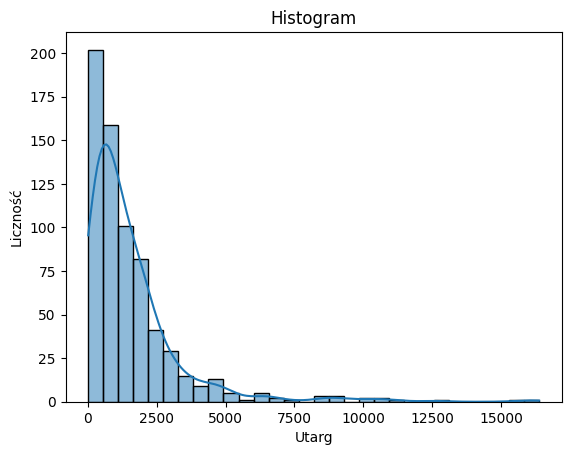

In [45]:
sns.histplot(data=orders, x='Utarg', kde=True, bins=30, edgecolor='black')
plt.title("Histogram")
plt.xlabel("Utarg")
plt.ylabel("Liczność")
plt.show()

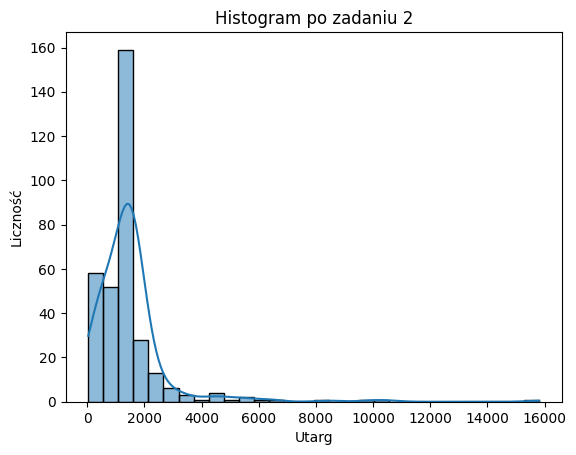

In [46]:
sns.histplot(data=orders_empty, x='Utarg', kde=True, bins=30, edgecolor='black')
plt.title("Histogram po zadaniu 2")
plt.xlabel("Utarg")
plt.ylabel("Liczność")
plt.show()

#Zadanie 4

Bazując na przykładach z punktu 2 na zbiorze zamowienia.csv policz:

4.1 Średnią wartość zamówienia dla każdego kraju.

4.2 Średnią wartość zamówienia dla każdego roku, a następnie miesiąca (grupowanie dwustopniowe).\

4.3 Liczbę zamówień, którą złożył każdy sprzedawca w danym roku.

4.4 Nazwę sprzedawcy z każdego kraju, którego sumaryczny utarg był najwyższy.

4.5 Sumę utargu w każdym kwartale (uwzględnij również rok), i posortuj od wartości najwyższych.

In [47]:
# 4.1
avg = orders.groupby('Kraj')['Utarg'].mean()
print(avg)

Kraj
Niemcy    1555.82790
Polska    1530.36905
Name: Utarg, dtype: float64


In [48]:
# 4.2
orders['Data zamowienia'] = pd.to_datetime(orders['Data zamowienia'])
orders['Rok'] = orders['Data zamowienia'].dt.year
orders['Miesiac'] = orders['Data zamowienia'].dt.month
avg = orders.groupby(['Rok', 'Miesiac'])['Utarg'].mean()
print(avg)

Rok     Miesiac
2003.0  7.0        1336.905000
        8.0        1073.203333
        9.0         909.120000
        10.0       1461.738696
        11.0       2212.415385
        12.0       1685.126957
2004.0  1.0        2005.837500
        2.0        1301.409524
        3.0        1114.020400
        4.0         986.020000
        5.0        2311.179167
        6.0        1260.758000
        7.0        1400.113158
        8.0        1696.730500
        9.0        1367.077917
        10.0       1900.190833
        11.0       1164.164643
        12.0       1858.019167
2005.0  1.0        1458.498500
        2.0        2159.751429
        3.0        1246.746667
        4.0        2105.693148
        5.0         484.823333
Name: Utarg, dtype: float64


In [49]:
# 4.3
orders['Data zamowienia'] = pd.to_datetime(orders['Data zamowienia'])
orders['Rok'] = orders['Data zamowienia'].dt.year
print(orders.groupby(['Sprzedawca', 'Rok']).size())

Sprzedawca  Rok   
BRAK        2003.0     8
            2004.0    29
            2005.0    21
Callahan    2003.0    14
            2004.0    41
            2005.0    17
Davolio     2003.0    20
            2004.0    38
            2005.0    27
Dudek       2003.0     3
            2004.0    13
            2005.0    12
Fuller      2003.0    12
            2004.0    31
            2005.0    28
King        2003.0     8
            2004.0    20
            2005.0    16
Kowalski    2003.0     8
            2004.0    15
            2005.0    10
Leverling   2003.0    14
            2004.0    49
            2005.0    27
Peacock     2003.0    26
            2004.0    56
            2005.0    31
Sowiński    2003.0    10
            2004.0    19
            2005.0    16
dtype: int64


In [51]:
# 4.4
grouped = orders.groupby(['Kraj', 'Sprzedawca'])['Utarg'].sum().reset_index()
max_sales = grouped.loc[grouped.groupby('Kraj')['Utarg'].idxmax()]
print(max_sales[['Kraj', 'Sprzedawca', 'Utarg']])

     Kraj Sprzedawca      Utarg
5  Niemcy    Peacock  189984.92
8  Polska       King   92450.72


In [52]:
# 4.5
orders['Data zamowienia'] = pd.to_datetime(orders['Data zamowienia'])
orders['Rok'] = orders['Data zamowienia'].dt.year
orders['Kwartal'] = orders['Data zamowienia'].dt.to_period('Q')
quarterly_sales = orders.groupby(['Rok', 'Kwartal'])['Utarg'].sum().reset_index()
sorted_sales = quarterly_sales.sort_values(by='Utarg', ascending=False)
print(sorted_sales)

      Rok Kwartal      Utarg
6  2005.0  2005Q1  178814.12
5  2004.0  2004Q4  122793.65
7  2005.0  2005Q2  115161.90
2  2004.0  2004Q1  103320.21
1  2003.0  2003Q4  101139.31
3  2004.0  2004Q2   96459.78
4  2004.0  2004Q3   93346.63
0  2003.0  2003Q3   48451.52
